# GUC NETW 1003 Kmeans Assginmnet

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function

import required libraries

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

c:\Users\youss\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


> ### 1.1. Code for the distance function

write a function to calculate the distance between a set of cluster centroids and all the data points

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type)
* The function shoud be able to handel data points with any number of features and any number of points
* The function should be able to handle any K number of cluster centroids
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two
    - Ecluidian distance
    - Pearson correlation distance
  

In [5]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
## write code here for the Distance function here #
    if Distance_Type=='E':
      Cluster_Distance = Data_points - Cluster_Centroids[:, np.newaxis, :]
      #print('after minus',Cluster_Distance)
      Cluster_Distance = np.linalg.norm(Cluster_Distance,axis=2)
      #print('before transpose',Cluster_Distance)
      Cluster_Distance= Cluster_Distance.T
      #print('after transpose',Cluster_Distance)
    elif Distance_Type=='P':
      Cluster_Distance=np.concatenate((Data_points,Cluster_Centroids),axis=0)
      #print(Cluster_Distance)
      Cluster_Distance= np.corrcoef(Cluster_Distance)
      #print(Cluster_Distance)
      Cluster_Distance=1-Cluster_Distance[:Data_points.shape[0],Data_points.shape[0]:]
      #print('final',Cluster_Distance)
    return Cluster_Distance


In [8]:
#import numpy as np

# Matrix representing multiple points
#points = np.array([[1, 2],
#                   [9, 1],
#                   [-3, 2],
#                   [1,1]])
#print(points.shape)
# Matrix representing multiple centroids
#centroids = np.array([[3, 4],
#                      [1, 63],
#                      [5,2]])

#Calculate Pearson correlation coefficients for each point and each centroid
#Cluster_Distance=np.concatenate((points,centroids),axis=0)
#print(Cluster_Distance)
#Cluster_Distance= np.corrcoef(Cluster_Distance)
#print(Cluster_Distance)

#Cluster_Distance=1-Cluster_Distance[:points.shape[0],points.shape[0]:]
# Pearson correlation distances
#Cluster_Distance = points - centroids[:, np.newaxis, :]
#print(Cluster_Distance)
#Cluster_Distance = np.linalg.norm(Cluster_Distance,axis=2)
#print('before transpose',Cluster_Distance)
#print('after transpose',Cluster_Distance.T)
#min_indeces = np.argmin(Cluster_Distance.T, axis=1)
#print(min_indeces)
#print(Cluster_Distance.T/min_indeces[:,np.newaxis])
#print("Pearson Correlation Distance for each point and centroid:")
#print(Cluster_Distance)


(4, 2)
[[ 1  2]
 [ 9  1]
 [-3  2]
 [ 1  1]
 [ 3  4]
 [ 1 63]
 [ 5  2]]
[[ 1. -1.  1. nan  1.  1. -1.]
 [-1.  1. -1. nan -1. -1.  1.]
 [ 1. -1.  1. nan  1.  1. -1.]
 [nan nan nan nan nan nan nan]
 [ 1. -1.  1. nan  1.  1. -1.]
 [ 1. -1.  1. nan  1.  1. -1.]
 [-1.  1. -1. nan -1. -1.  1.]]


In [9]:
# Sample matrix with values from 0 to 2 in the last column
#matrix = np.array([[1, 2, 0],
#                   [4, 5, 2],
#                   [7, 8, 1],
#                   [10, 11, 0],
#                   [13, 14, 1]])

# Extract the last column

#last_column = matrix[:, -1]

# Find unique values and their corresponding indices in the last column
#unique_values, indices = np.unique(last_column, return_counts=True)

# Use np.add.at to accumulate sums based on indices
#sums_by_value = np.zeros((len(unique_values), matrix.shape[1]-1))
#np.add.at(sums_by_value, last_column, matrix[:,:-1])
#print(unique_values)
#print(sums_by_value)
#print(indices)
#print(last_column)


[0 1 2]
[[11. 13.]
 [20. 22.]
 [ 4.  5.]]
[2 2 1]
[0 2 1 0 1]


> ### 1.2. Code for K means function

> Loop until a stopping condition

> > in the loop do the following
> > 1. Cluster Assginmnet
> > > * Use the GUC_Distance to calculate between each cluster head and all the points
> > > * Find the value and index of the minimum distance  for each row.
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center)

In [4]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
    # write code for intial cluster heads here
    centroid_indeces=np.random.choice(np.arange(Data_points.shape[0]), Number_of_Clusters, replace=False)
    #centroid_indeces=np.random.randint(0,Data_points.shape[0],Number_of_Clusters)
    centroids=Data_points[centroid_indeces]
    #print(centroids)
    #print(Data_points)
    previous_centroids=centroids-1
    # write your your loop
    while not(centroids.shape == previous_centroids.shape) or  not((centroids==previous_centroids).all()):
      Cluster_Distance=GUC_Distance(centroids,Data_points,Distance_Type)
      #print(Cluster_Distance)
      min_indices = np.argmin(Cluster_Distance, axis=1)
      mse=np.sum(np.square(Data_points-centroids[min_indices]))*(1/Data_points.shape[0])
      unique_values, counts = np.unique(min_indices, return_counts=True)

      previous_centroids=centroids
      centroids = np.zeros((Number_of_Clusters,Data_points.shape[1]))
      np.add.at(centroids, min_indices, Data_points)
      centroids=centroids[unique_values]

      centroids=centroids/counts[:,np.newaxis]
      if (centroids.shape == previous_centroids.shape) and (np.linalg.norm(centroids-previous_centroids)<1e-4):
        break
    Final_Cluster_Distance=Cluster_Distance
    Cluster_Metric=mse
    return [ Final_Cluster_Distance , Cluster_Metric ]

## 2. Display Results

* below is a an example fuction that displayes Clusters in 2D

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures

* The function is a helper function that is originaly be found in
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [4]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function

In [45]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
from math import perm
from itertools import combinations

def calculate_rows_columns(number):
    rows = 1
    columns = number

    for i in range(2, int(number**0.5) + 1):
        if number % i == 0:
            rows = i
            columns = number // i

    return rows, columns
def display_cluster(X,km=[],num_clusters=0,indeces=[]):
    color = ['b','r','g','c','m','y','k','#FFFF00','#F00F00','#0FF0F0']  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(len(X)):
            plt.scatter(X[i,0],X[i,1],c = color[indeces[i]],alpha = alpha,s=s)
            #plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

def display_cluster2(X,km=[],num_clusters=0,indeces=[]):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    combinations_result = list(combinations(np.arange(X.shape[1]), 2))
    nrows,ncols=calculate_rows_columns(len(combinations_result))
    if len(combinations_result)==1:
        display_cluster(X,km,num_clusters,indeces)
        return
    if num_clusters == 0:
        for iteration in combinations_result:
            for i in range(len(X)):
                axs[row,col].scatter(X[i,iteration[0]],X[i,iteration[1]],c = color[0],alpha = alpha,s=s)
                
            if col==ncols-1:
                col=0
                row=row+1
            else:
                col=col+1
    else:

      fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
      row=0
      col=0
      for iteration in combinations_result:
        for i in range(len(X)):
            axs[row,col].scatter(X[i,iteration[0]],X[i,iteration[1]],c = color[indeces[i]],alpha = alpha,s=s)
            #plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
            
        if col==ncols-1:
            col=0
            row=row+1
        else:
            col=col+1
        


> #### 2.2. Example 1 : Circular Data Gen and display

* below is an example of how to use the funciton
  *  prepare the figure size and background
   > * this part can be replaced by a number of subplots
  
  * Produce a data set that represent the x and y o coordinates of a circle
   > * this part can be replaced by data that you import froma file
  
  * Data is displayed
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction

(20, 2)


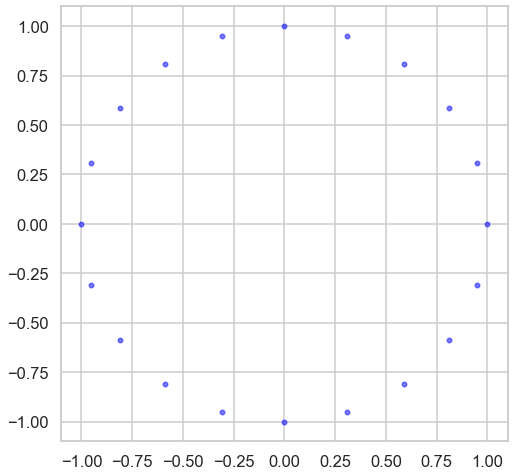

In [6]:
# prepare the figure sise and background
# this part can be replaced by a number of subplots
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle
# this part can be replaced by data that you import froma file
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction
display_cluster(X1)
print(X1.shape)

> #### 2.3. Example 2 : Multi blob Data Gen and display

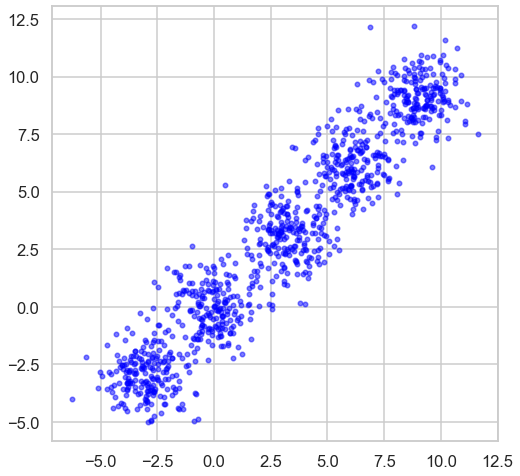

In [7]:
n_samples = 1000
n_bins = 4
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y2 = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X2)

#### 2.3. Example 3 : moons Data Gen and display

1
1


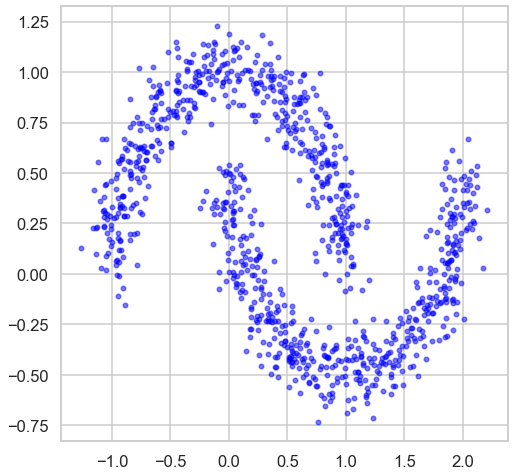

In [40]:
n_samples = 1000
X3, y3 = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster2(X3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps

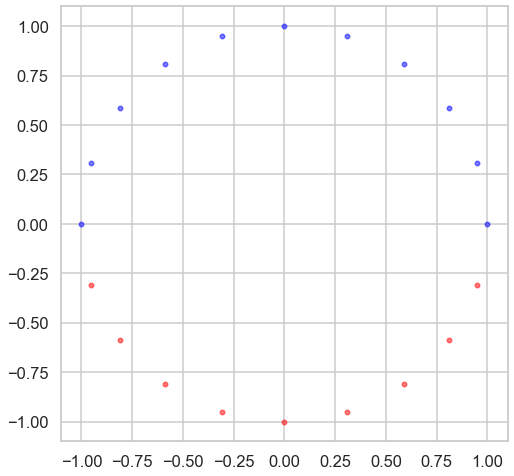

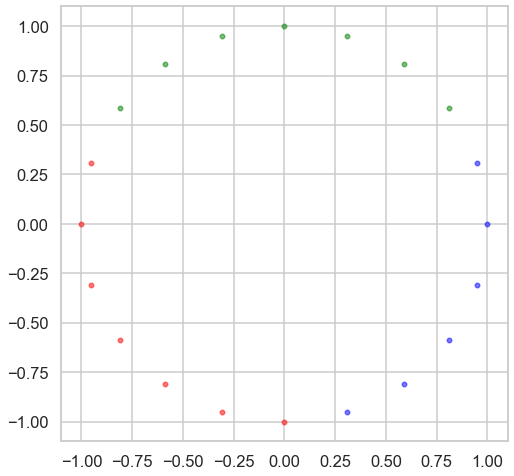

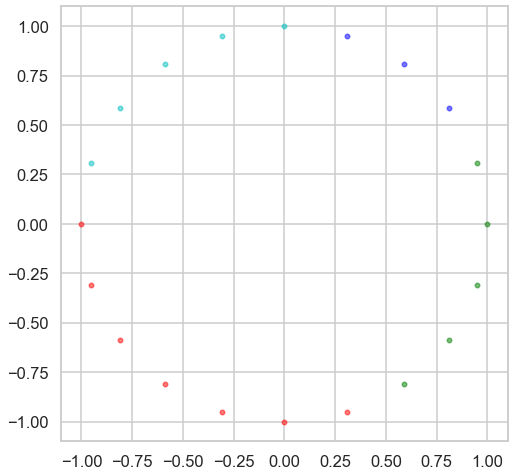

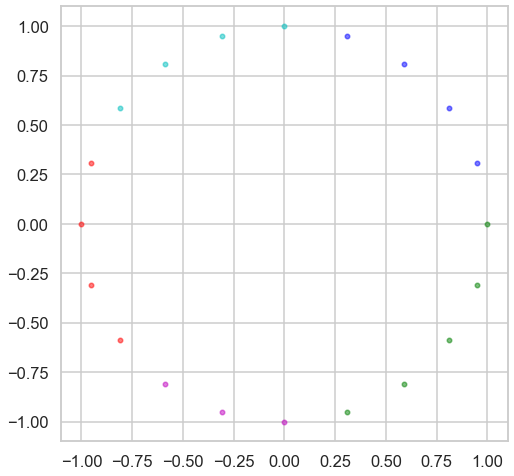

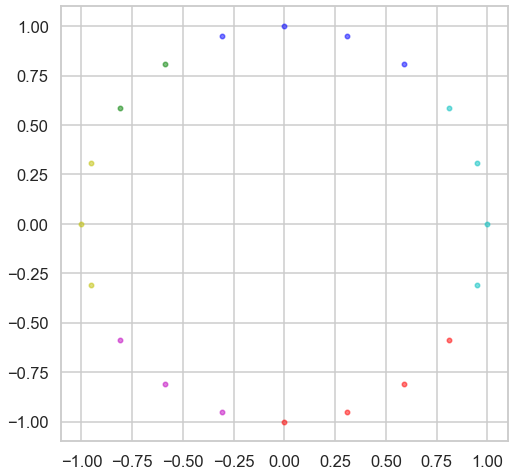

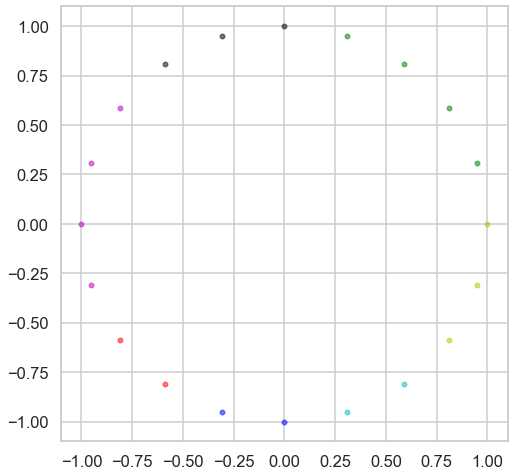

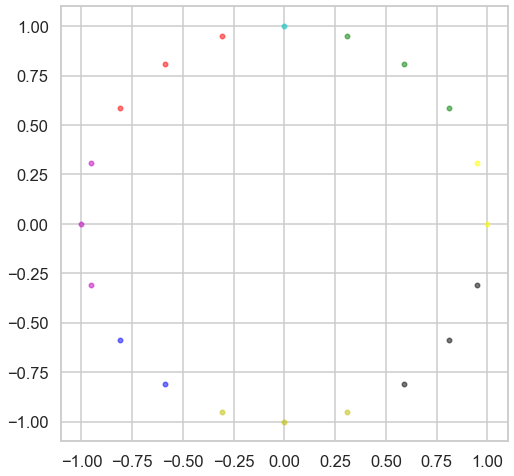

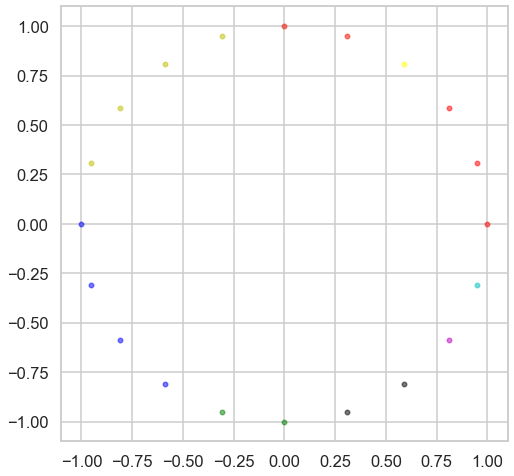

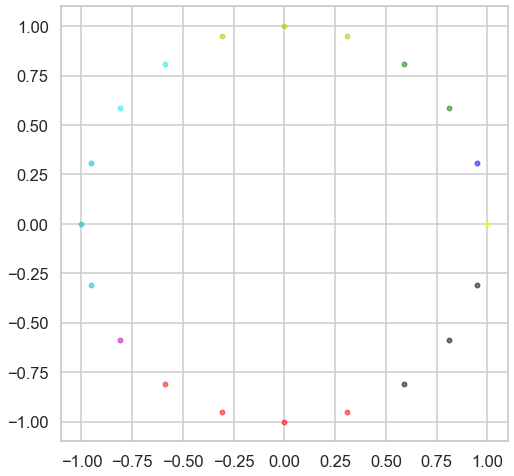

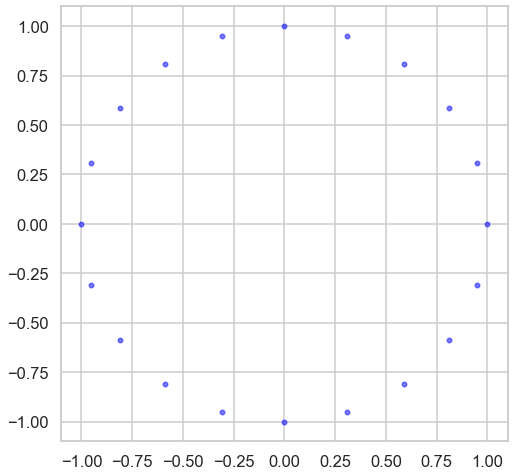

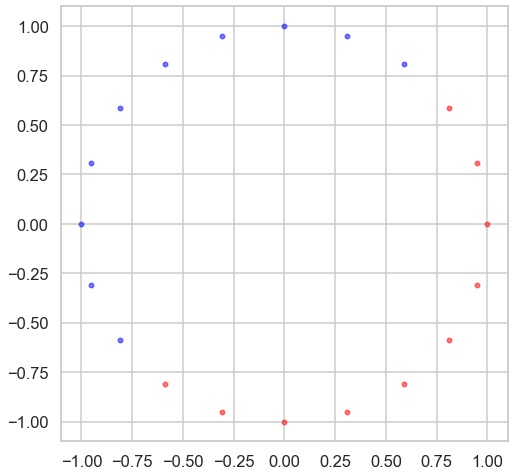

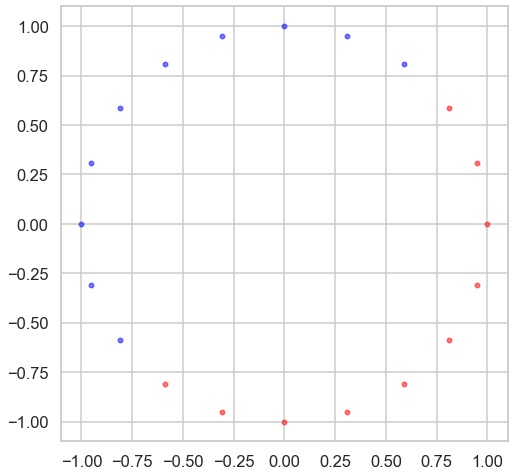

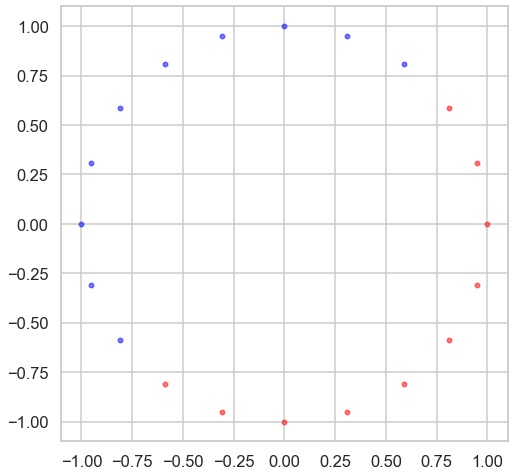

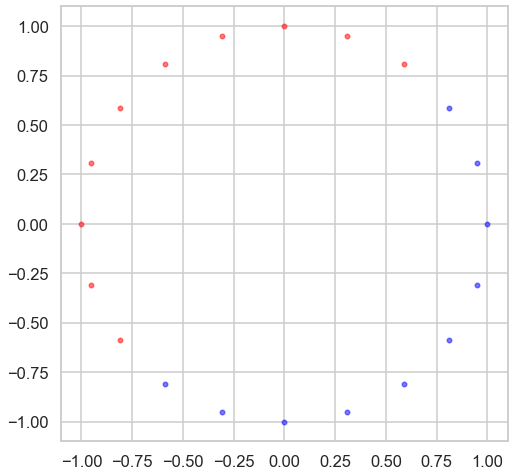

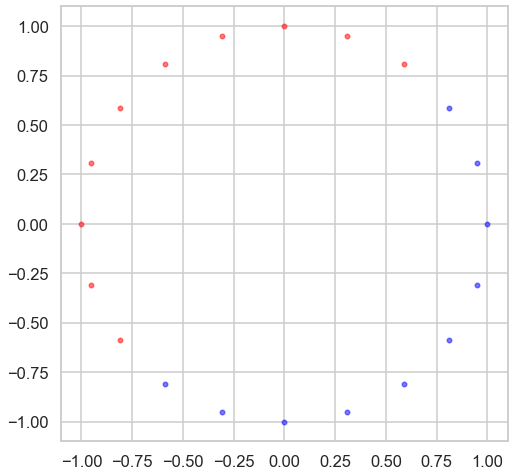

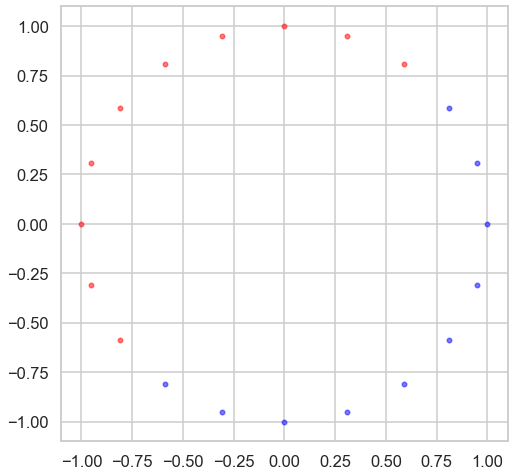

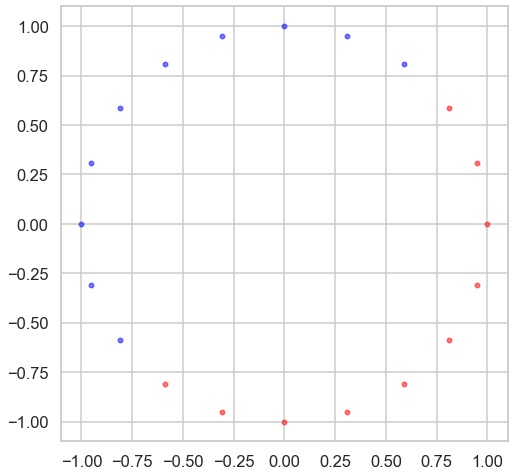

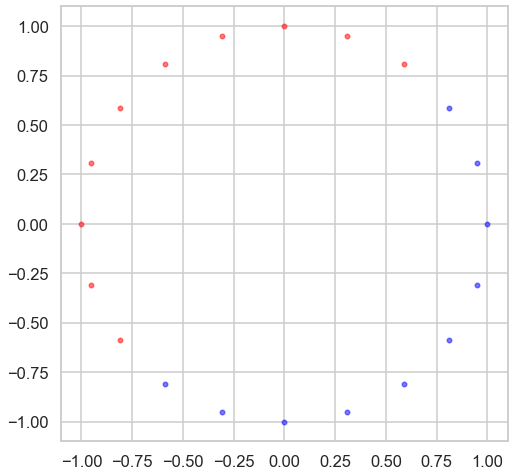

<Figure size 576x576 with 0 Axes>

In [46]:
for i in range(2,11):
    Cluster_Distance,mse=GUC_Kmean(X1,i,'E')
    min_indices = np.argmin(Cluster_Distance, axis=1)
    display_cluster2(X1,num_clusters=i,indeces=min_indices)
    plt.figure()
    
for i in range(2,11):
    Cluster_Distance,mse=GUC_Kmean(X1,i,'P')
    min_indices = np.argmin(Cluster_Distance, axis=1)
    display_cluster2(X1,num_clusters=i,indeces=min_indices)
    plt.figure()

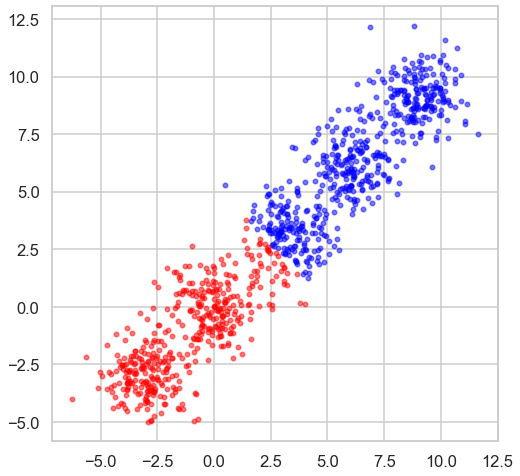

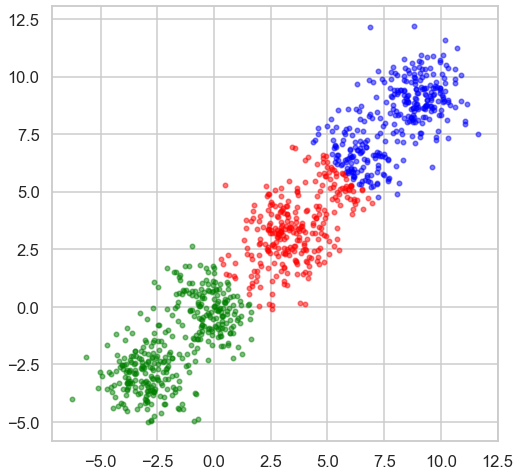

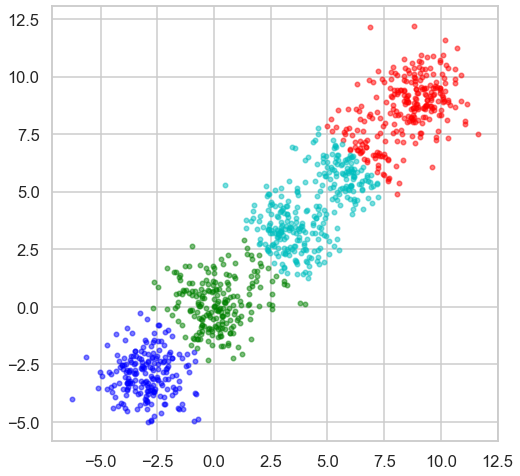

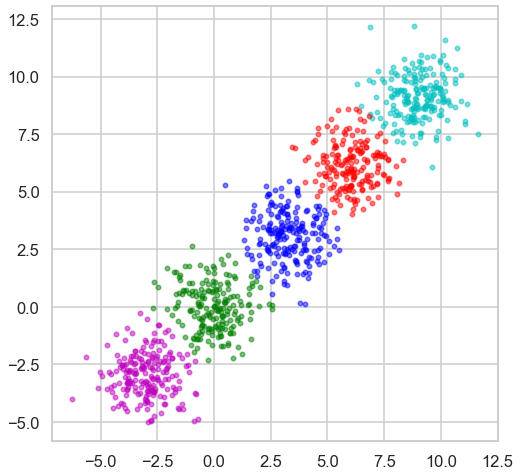

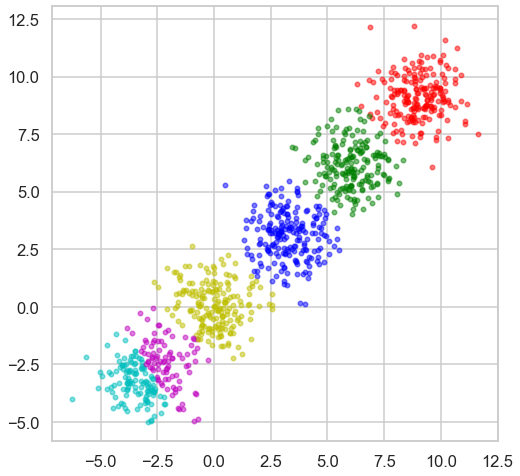

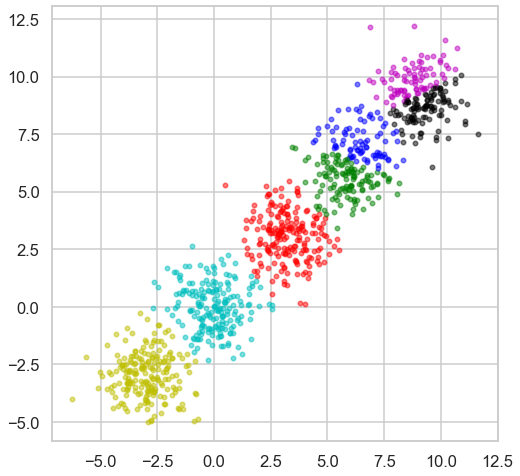

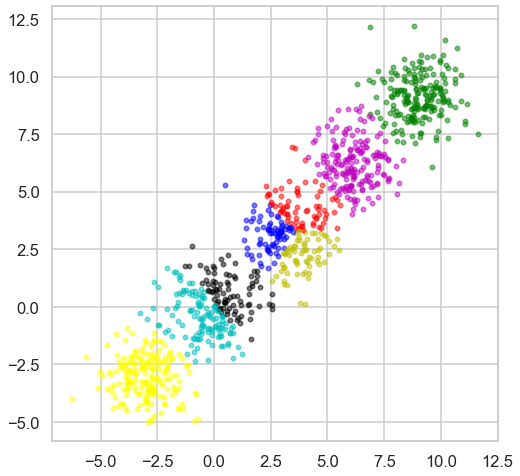

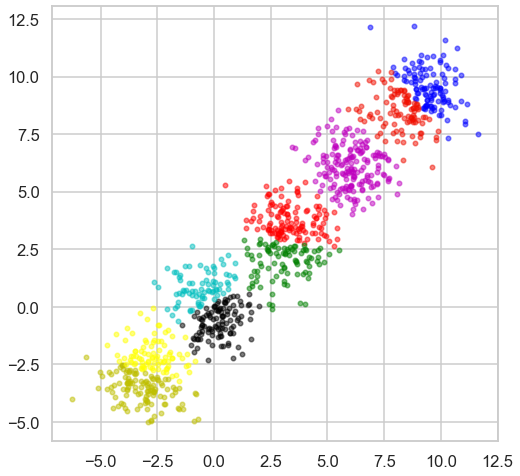

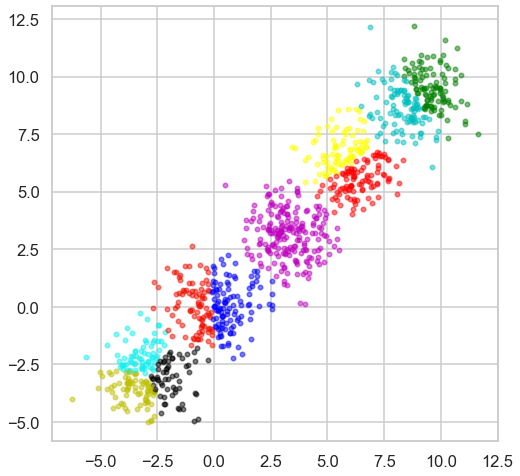

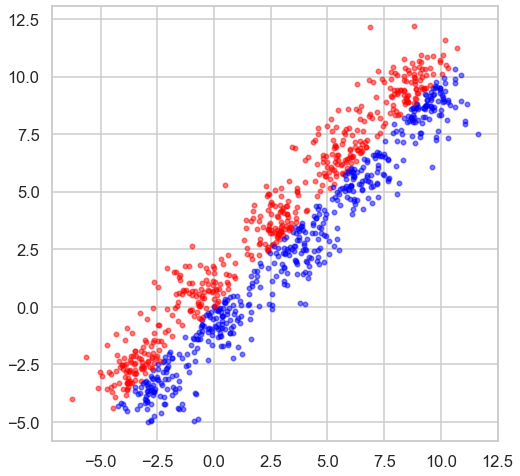

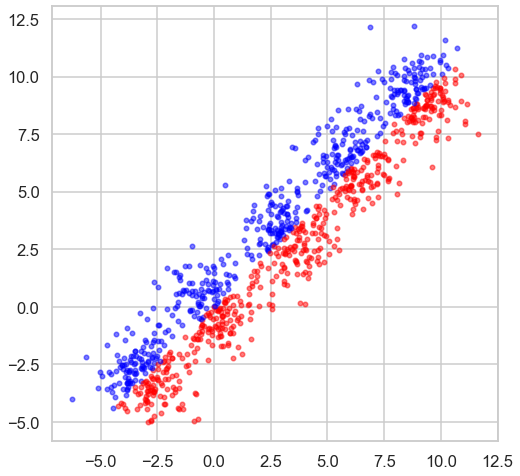

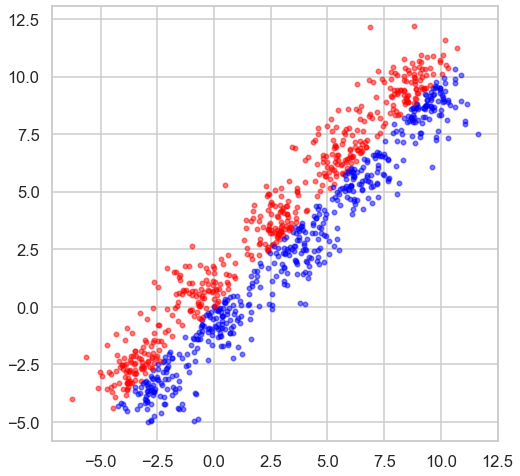

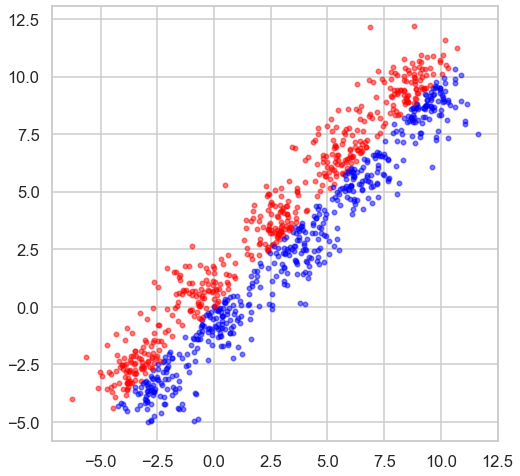

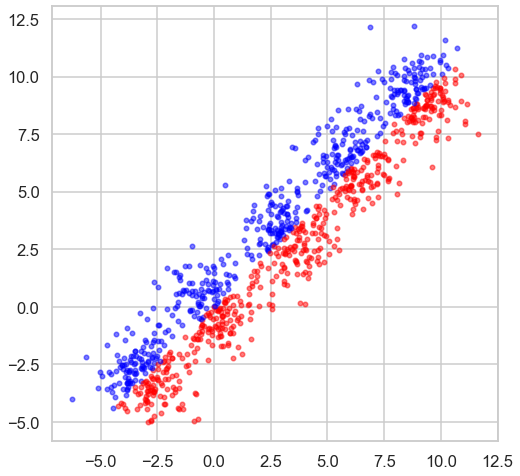

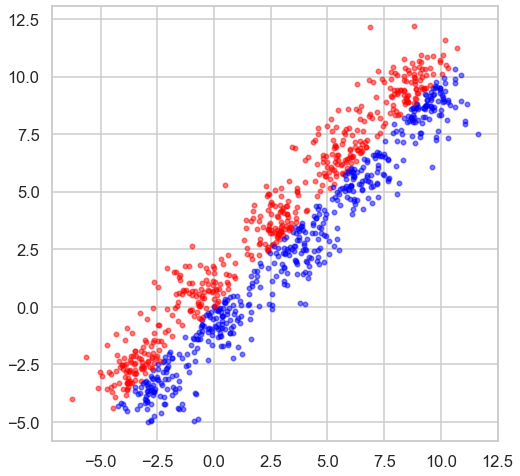

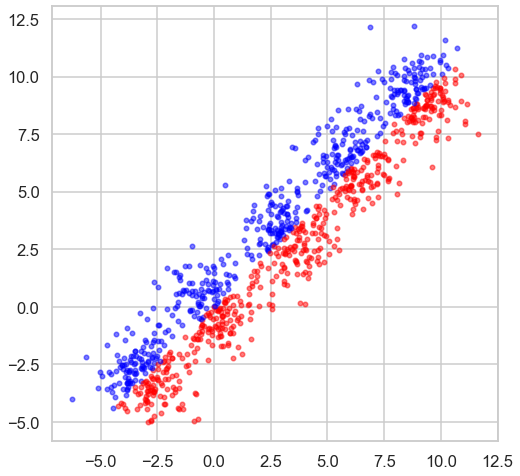

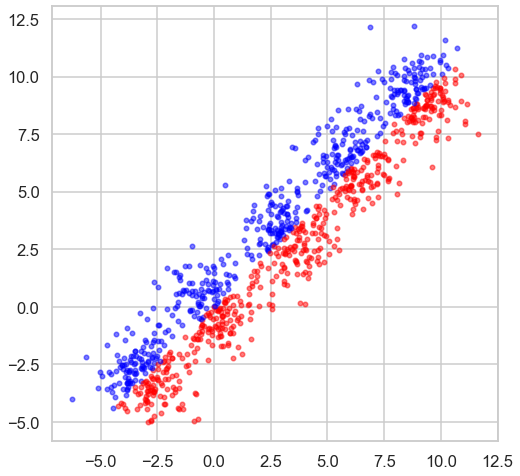

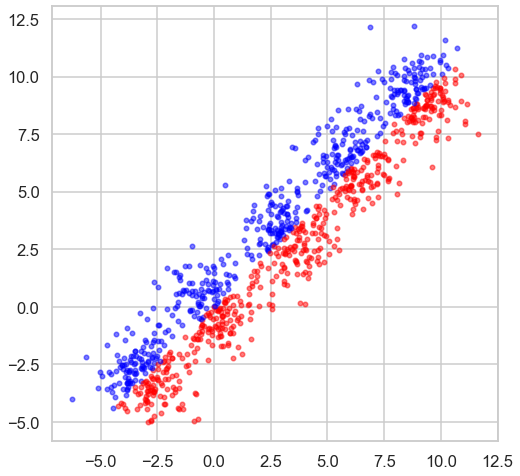

<Figure size 576x576 with 0 Axes>

In [48]:
for i in range(2,11):
    Cluster_Distance,mse=GUC_Kmean(X2,i,'E')
    min_indices = np.argmin(Cluster_Distance, axis=1)
    display_cluster2(X2,num_clusters=i,indeces=min_indices)
    plt.figure()
    
for i in range(2,11):
    Cluster_Distance,mse=GUC_Kmean(X2,i,'P')
    min_indices = np.argmin(Cluster_Distance, axis=1)
    display_cluster2(X2,num_clusters=i,indeces=min_indices)
    plt.figure()

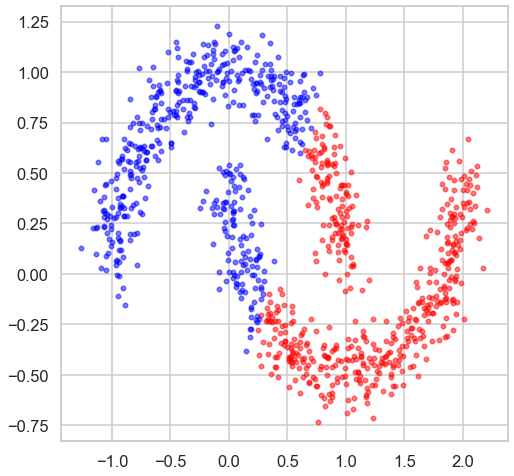

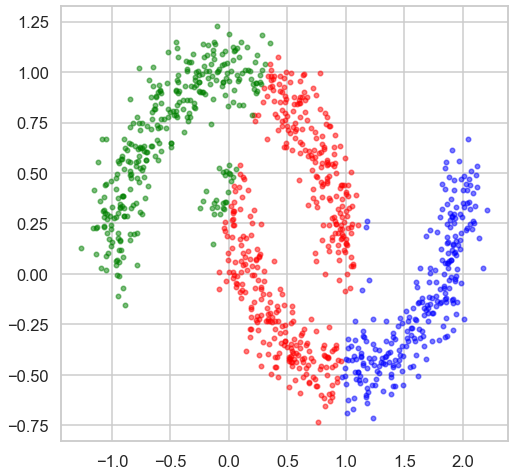

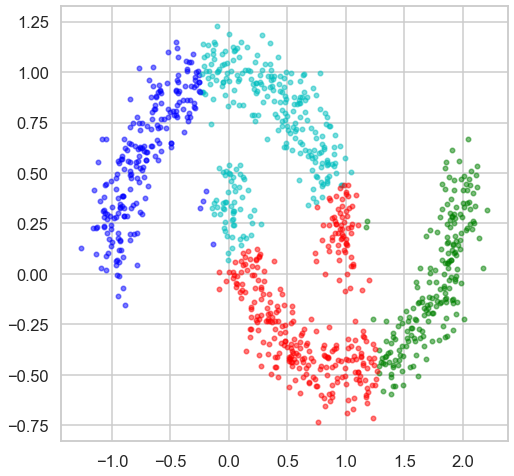

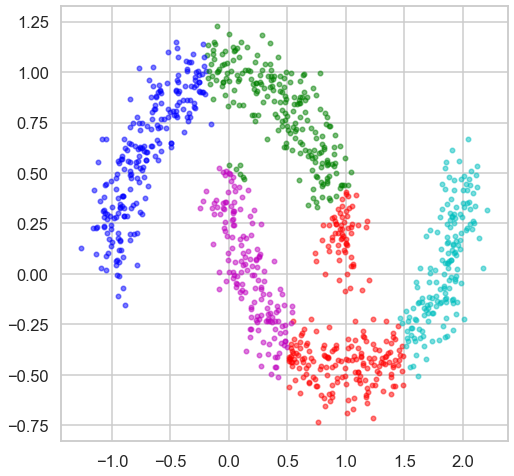

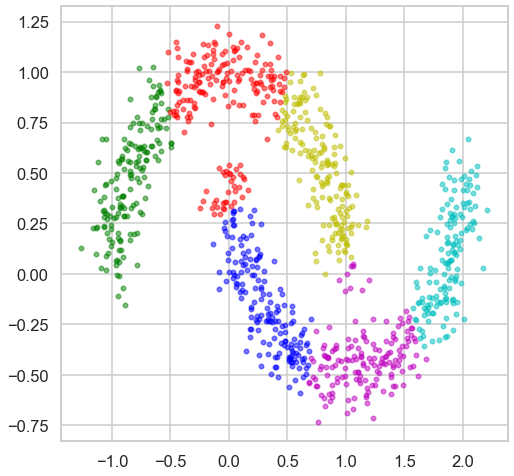

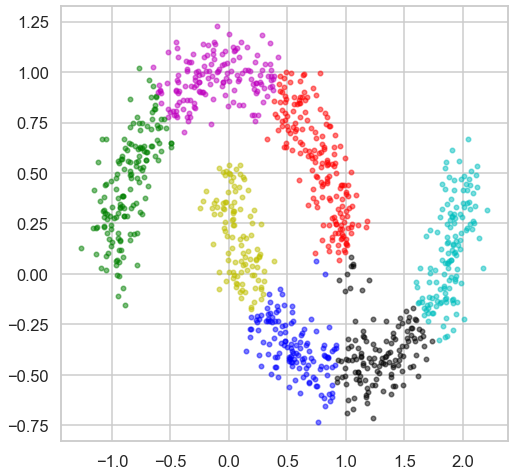

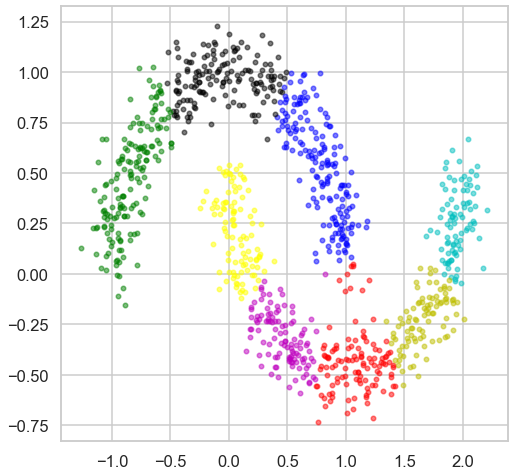

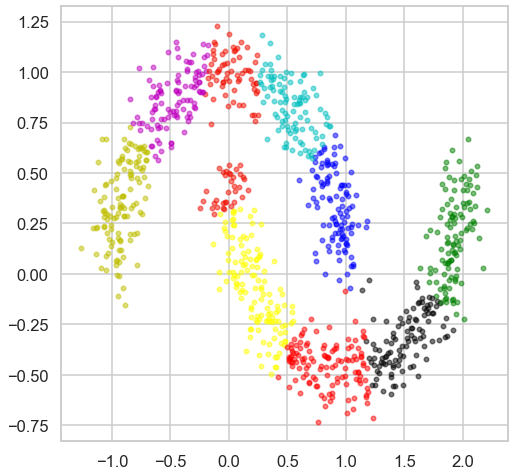

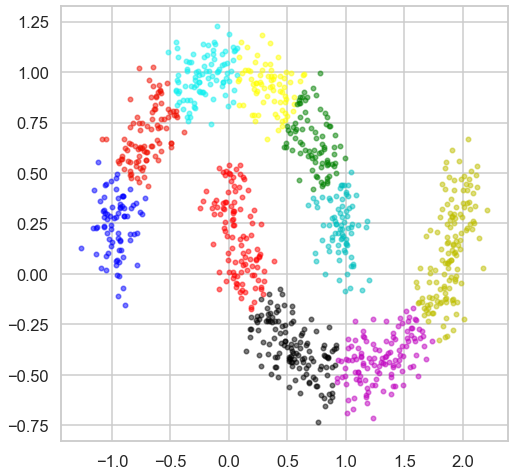

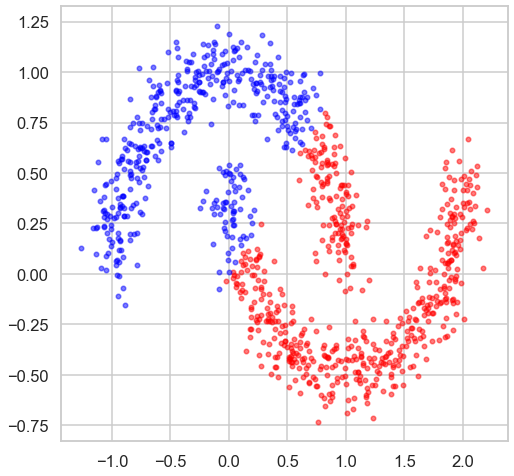

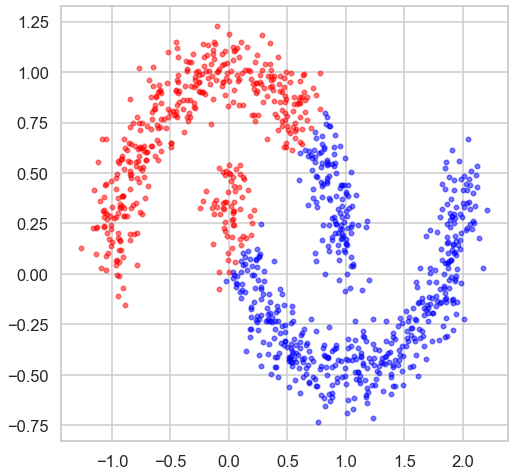

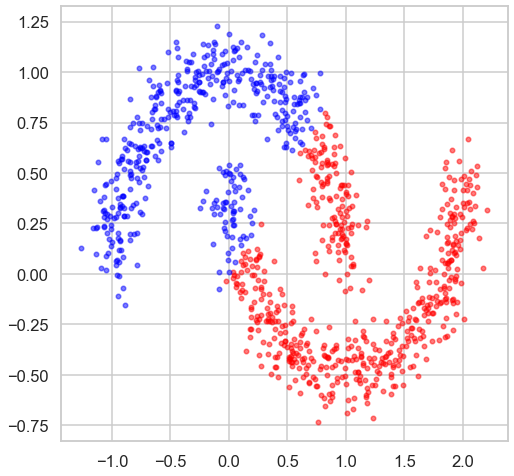

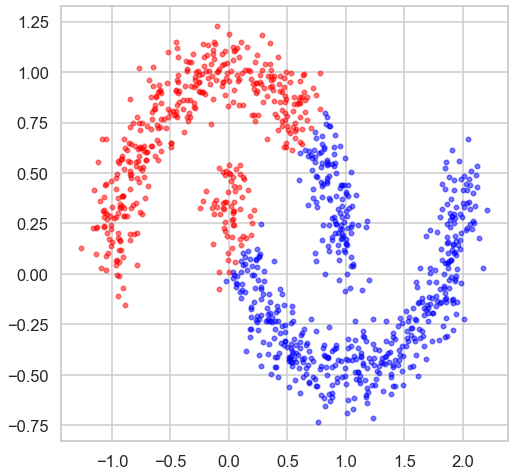

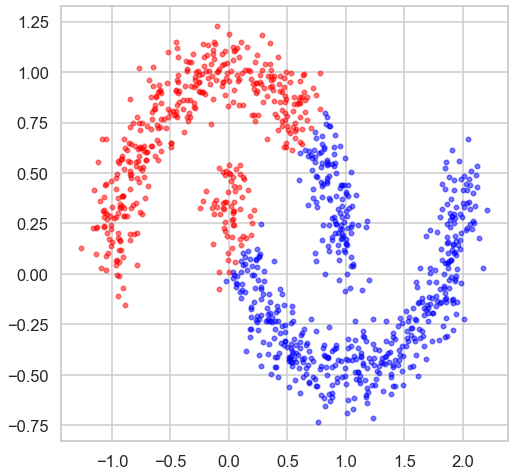

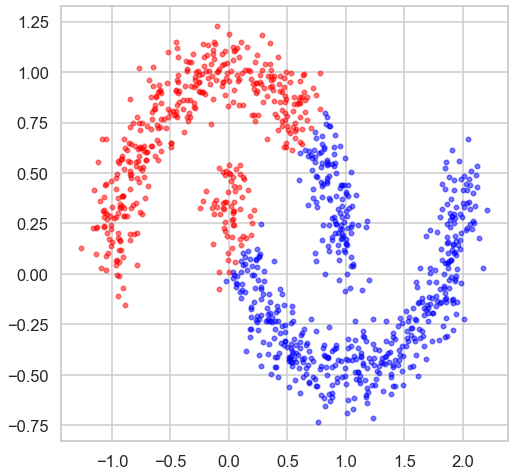

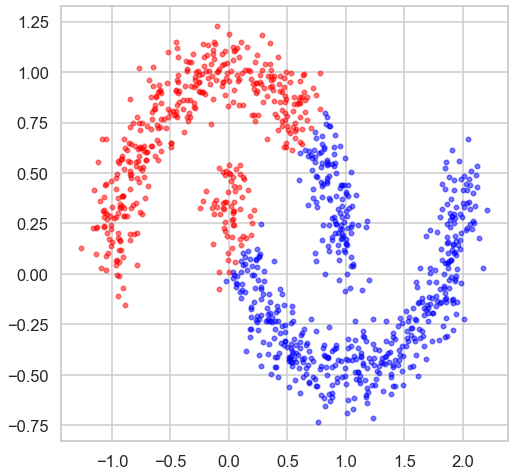

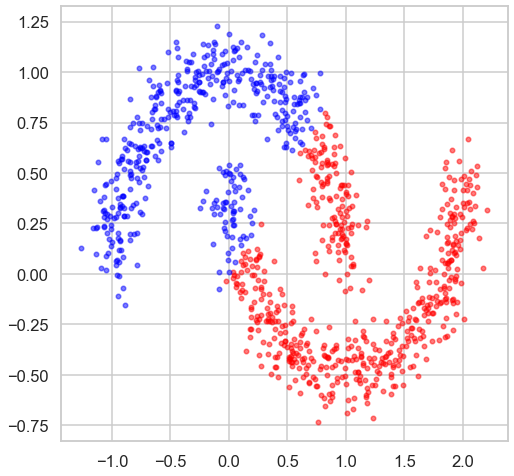

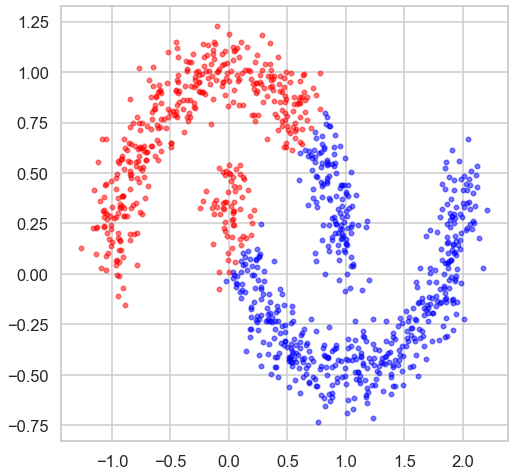

<Figure size 576x576 with 0 Axes>

In [49]:
for i in range(2,11):
    Cluster_Distance,mse=GUC_Kmean(X3,i,'E')
    min_indices = np.argmin(Cluster_Distance, axis=1)
    display_cluster2(X3,num_clusters=i,indeces=min_indices)
    plt.figure()
    
for i in range(2,11):
    Cluster_Distance,mse=GUC_Kmean(X3,i,'P')
    min_indices = np.argmin(Cluster_Distance, axis=1)
    display_cluster2(X3,num_clusters=i,indeces=min_indices)
    plt.figure()

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps

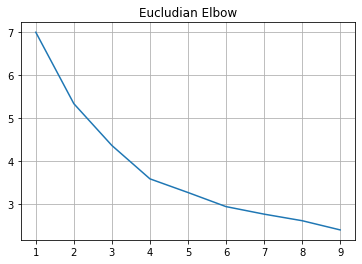

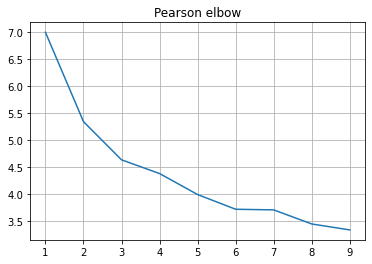

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Specify the path to your CSV file
csv_file_path = "Customer data.csv"

# Read the CSV file into a DataFrame using pandas
df = pd.read_csv(csv_file_path)
df = df.drop('ID', axis=1)
# Display the DataFrame
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
#pca = PCA(n_components=2)
#principal_components = pca.fit_transform(df_standardized)
all_mse=[]
x=np.arange(1,10)
#numpy_df=principal_components
numpy_df=df_standardized.to_numpy()
for i in range(1,10):
  Distance,mse=GUC_Kmean(numpy_df,i,'E')
  min_indices = np.argmin(Distance, axis=1)
  all_mse.append(mse)
plt.plot(x,all_mse)
plt.grid()
plt.title('Eucludian Elbow')
plt.show()


all_mse=[]
for i in range(1,10):
  Distance,mse=GUC_Kmean(numpy_df,i,'P')
  min_indices = np.argmin(Distance, axis=1)
  all_mse.append(mse)
plt.plot(x,all_mse)
plt.grid()
plt.title('Pearson elbow')
plt.show()

#display_cluster(numpy_df,num_clusters=5,indeces=min_indices)

# all_mse=[]
# x=np.arange(1,10)
# numpy_df=df_standardized.to_numpy()
# for i in range(1,10):
#   Distance,mse=GUC_Kmean(numpy_df,i,'P')
#   min_indices = np.argmin(Distance, axis=1)
#   all_mse.append(mse)
# plt.plot(x,all_mse)
# plt.show()


[1 2 3 ... 3 2 3]


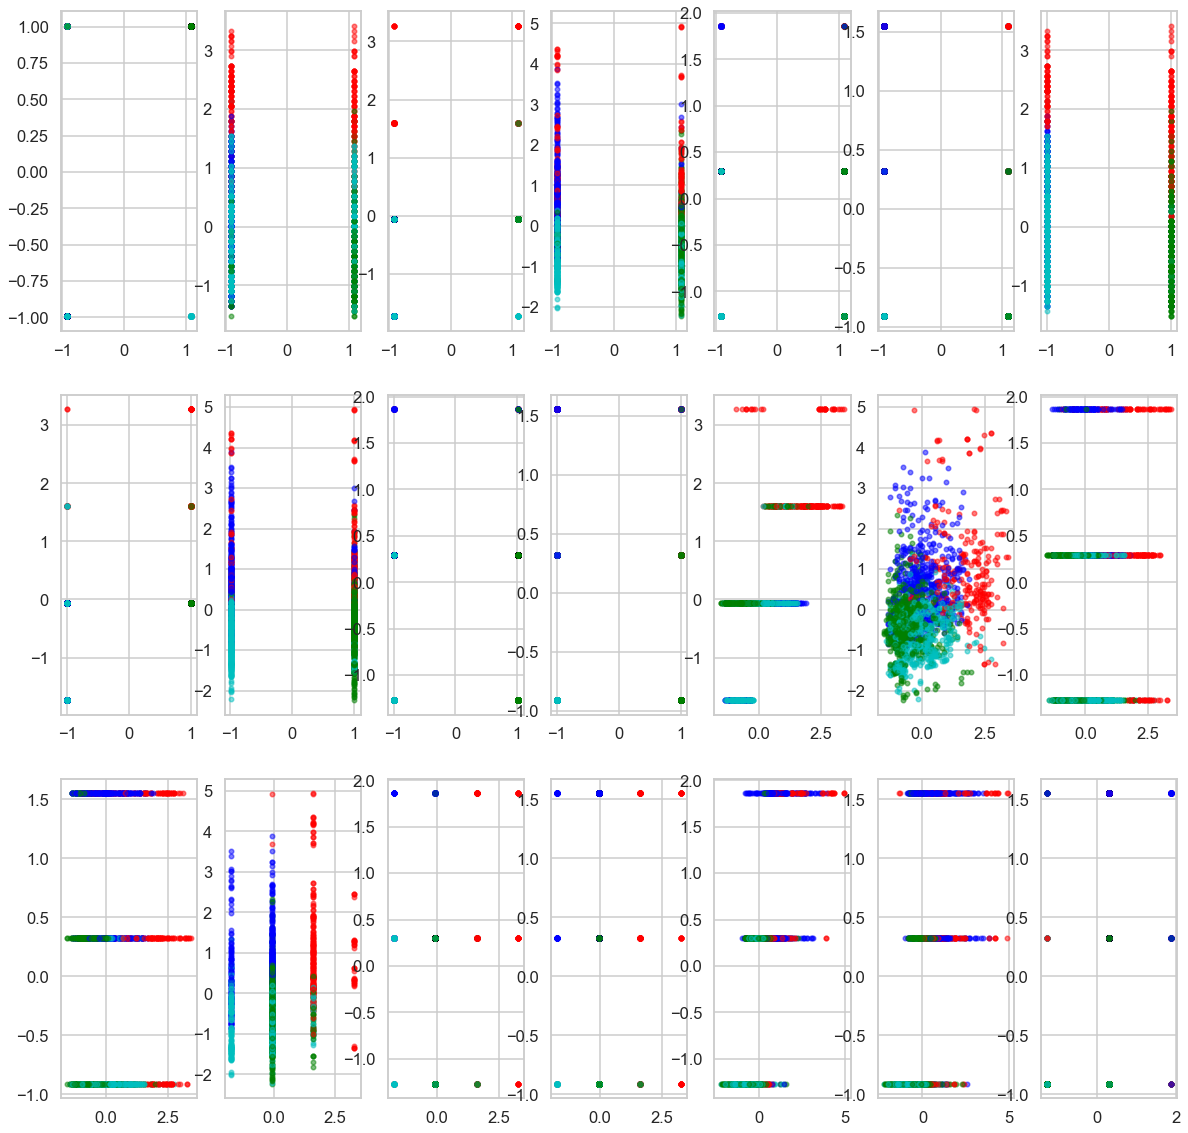

In [20]:

Distance,mse=GUC_Kmean(numpy_df,4,'E')
min_indices = np.argmin(Distance, axis=1)
print(min_indices)
display_cluster2(numpy_df,num_clusters=4,indeces=min_indices)